In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# Юнит 2

## Задание 2.7

In [3]:
instr_data = pd.read_csv('../data/values_from_the_instrument.csv')

instr_data.info()
X = instr_data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


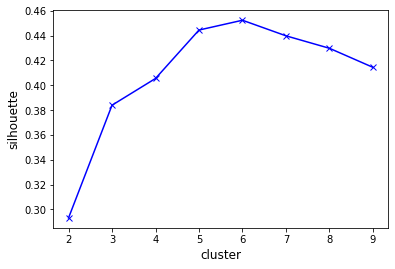

In [68]:
# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1', ylabel='x2'>

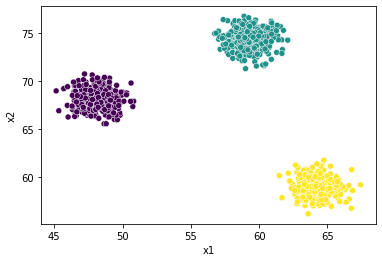

In [10]:
k_means_best = KMeans(n_clusters=3, random_state=42)
k_means_best.fit(X)

sns.scatterplot(X['x1'], X['x2'], c=k_means_best.labels_)

# Юнит 3

## Задание 3.3

In [2]:
from sklearn.metrics import homogeneity_score

print(homogeneity_score([1, 2, 2, 1, 0], [1, 0, 2, 1, 2]))

0.737175493807016


# Юнит 5

## Задание 5.4

In [6]:
from sklearn.mixture import GaussianMixture

In [4]:
housing = pd.read_csv('../data/housing.csv')
housing.info()
X = housing.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1355 non-null   float64
 1   price   1355 non-null   float64
dtypes: float64(2)
memory usage: 21.3 KB


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

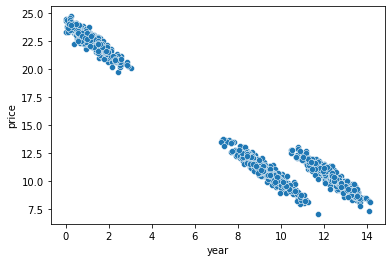

In [5]:
sns.scatterplot(X['year'], X['price'])

In [13]:
housing_clustering = GaussianMixture(n_components=3, random_state=42)
housing_clustering.fit(X)
housing_clustering_pred = housing_clustering.predict(X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

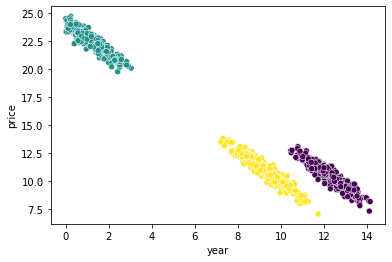

In [14]:
sns.scatterplot(X['year'], X['price'], c=housing_clustering_pred)

## Задание 5.5

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

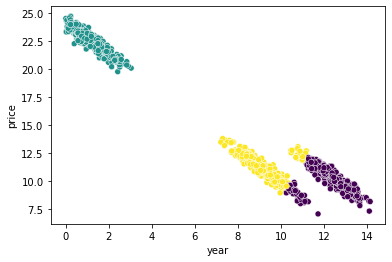

In [15]:
housing_kmeans = KMeans(n_clusters=3, random_state=42)
housing_kmeans.fit(X)
housing_kmeans_pred = housing_kmeans.predict(X)

sns.scatterplot(X['year'], X['price'], c=housing_kmeans_pred)

# Юнит 7

## Задание 7.5

In [1]:
from sklearn.cluster import DBSCAN

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

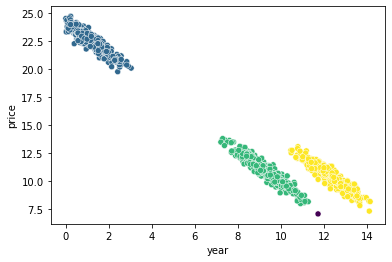

In [13]:
esp = 0.7
min_samples = 6

housing_cluster_dbscan = DBSCAN(eps=esp, min_samples=min_samples)
housing_cluster_dbscan.fit(X)

sns.scatterplot(X['year'], X['price'], c=housing_cluster_dbscan.labels_)

# Юнит 8

In [58]:
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

## Задание 8.4

In [15]:
airbnb = pd.read_csv('../data/airbnb.csv')
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              350 non-null    int64  
 1   name                            350 non-null    object 
 2   host_id                         350 non-null    int64  
 3   host_name                       350 non-null    object 
 4   neighbourhood_group             350 non-null    object 
 5   neighbourhood                   350 non-null    object 
 6   latitude                        350 non-null    float64
 7   longitude                       350 non-null    float64
 8   room_type                       350 non-null    object 
 9   price                           350 non-null    int64  
 10  minimum_nights                  350 non-null    int64  
 11  number_of_reviews               350 non-null    int64  
 12  last_review                     337 

In [30]:
airbnb_cluster_aglom = AgglomerativeClustering(n_clusters=6, linkage='complete')

X = airbnb[['latitude', 'longitude']]
airbnb_cluster_pred = airbnb_cluster_aglom.fit_predict(X)

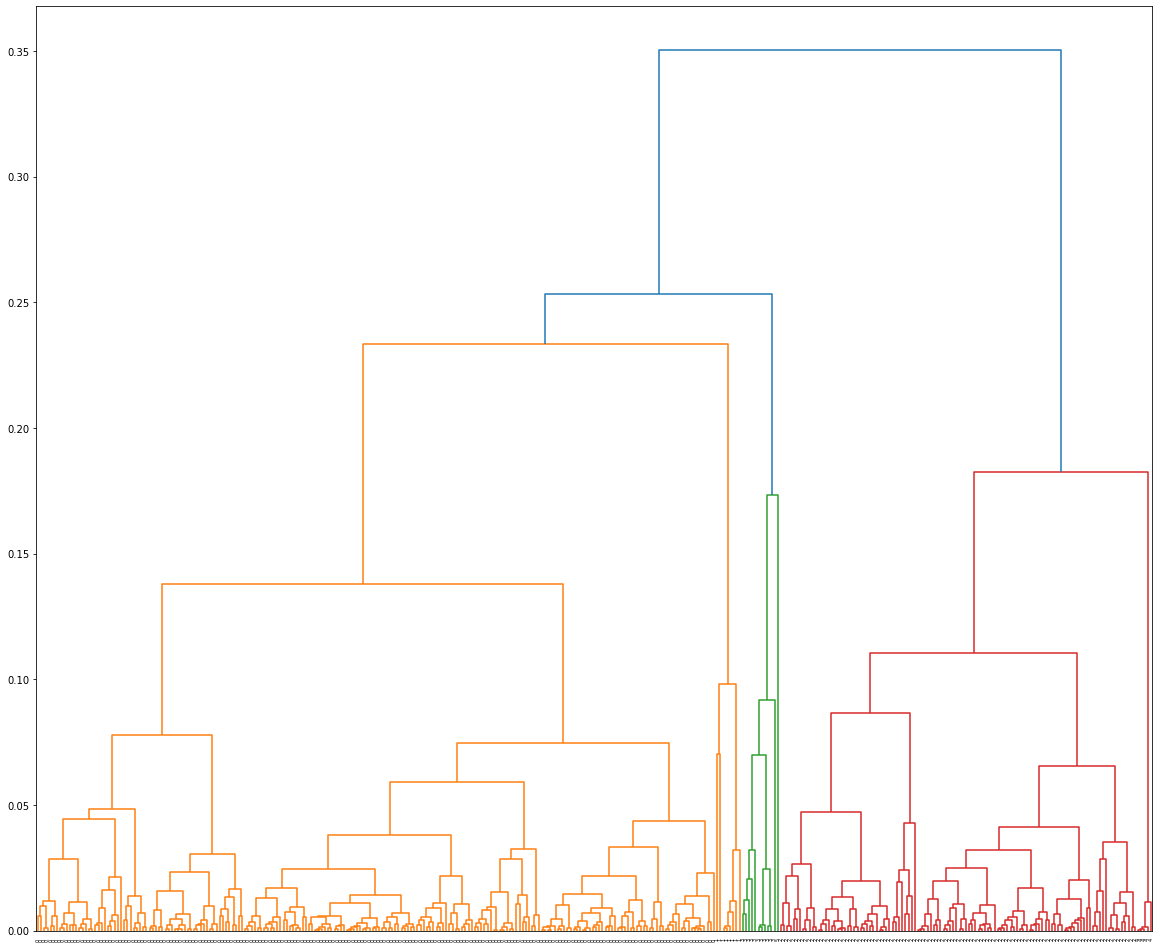

In [31]:
linked = linkage(X, 'complete')
plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=airbnb_cluster_pred,
            distance_sort='descending')

plt.show()

## Задание 8.5

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

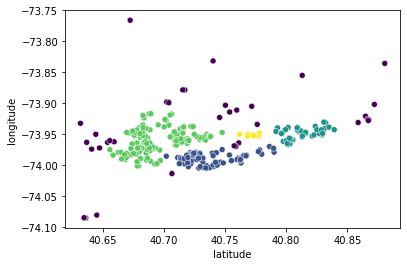

In [32]:
esp = 0.012
min_samples = 6
airbnb_cluster_dbscan = DBSCAN(eps=esp, min_samples=min_samples)
airbnb_cluster_dbscan.fit(X)

sns.scatterplot(X['latitude'], X['longitude'], c=airbnb_cluster_dbscan.labels_)

# Юнит 10

In [34]:
import pandas as pd
from sklearn import preprocessing 

In [47]:
# загрузим данные
df = pd.read_csv("../data/segmented_customers.csv")
# посмотрим на данные
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     200 non-null    int64  
 1   gender          200 non-null    int64  
 2   age             200 non-null    float64
 3   annual_income   200 non-null    float64
 4   spending_score  200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


In [37]:
# пропусков не так много, поэтому мы можем удалить данные с пропусками
df = df.dropna()

# переименуем столбцы для более удобной работы
df.rename(columns = {'CustomerID' : 'customer_id', 'Gender' : 'gender', 
                    'Age': 'age', 'Annual Income (k$)': 'annual_income', 
                    'Spending Score (1-100)': 'spending_score', }, inplace = True)

In [43]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
fig = px.scatter_3d(
    data_frame=df, 
    x = 'age', 
    y = 'annual_income', 
    z = 'spending_score', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

In [44]:
def get_3d_visualization(df, clust_res):
    fig = px.scatter_3d(
        data_frame=df, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )

    #возвращаем график
    return fig

In [45]:
X = df[['age', 'annual_income', 'spending_score']]

## Задание 10.1

In [48]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(X)

display(clustering.labels_)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

200

## Задание 10.2

In [56]:
eps = 11
min_samples = 5

clustering_new = DBSCAN(eps=eps, min_samples=min_samples)

clustering_new.fit(X)

display(clustering_new.labels_)

get_3d_visualization(X, clustering_new.labels_)

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0, -1, -1,  1,  0, -1,  0, -1,  0,  1, -1,  1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0,  1,  0, -1,  0,  2,  2, -1,  0,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3, -1,  3,  2,  3, -1,  3,  4,  3, -1,  3, -1,  3,
        4,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,  4,  3,  4,  3,  4,
        3,  4,  3, -1,  3, -1,  3, -1,  3, -1,  3,  4,  3,  4,  3,  4, -1,
        4,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
       -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

## Задание 10.4

In [57]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# напишем функцию, которая будет проводить алгомеративную кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

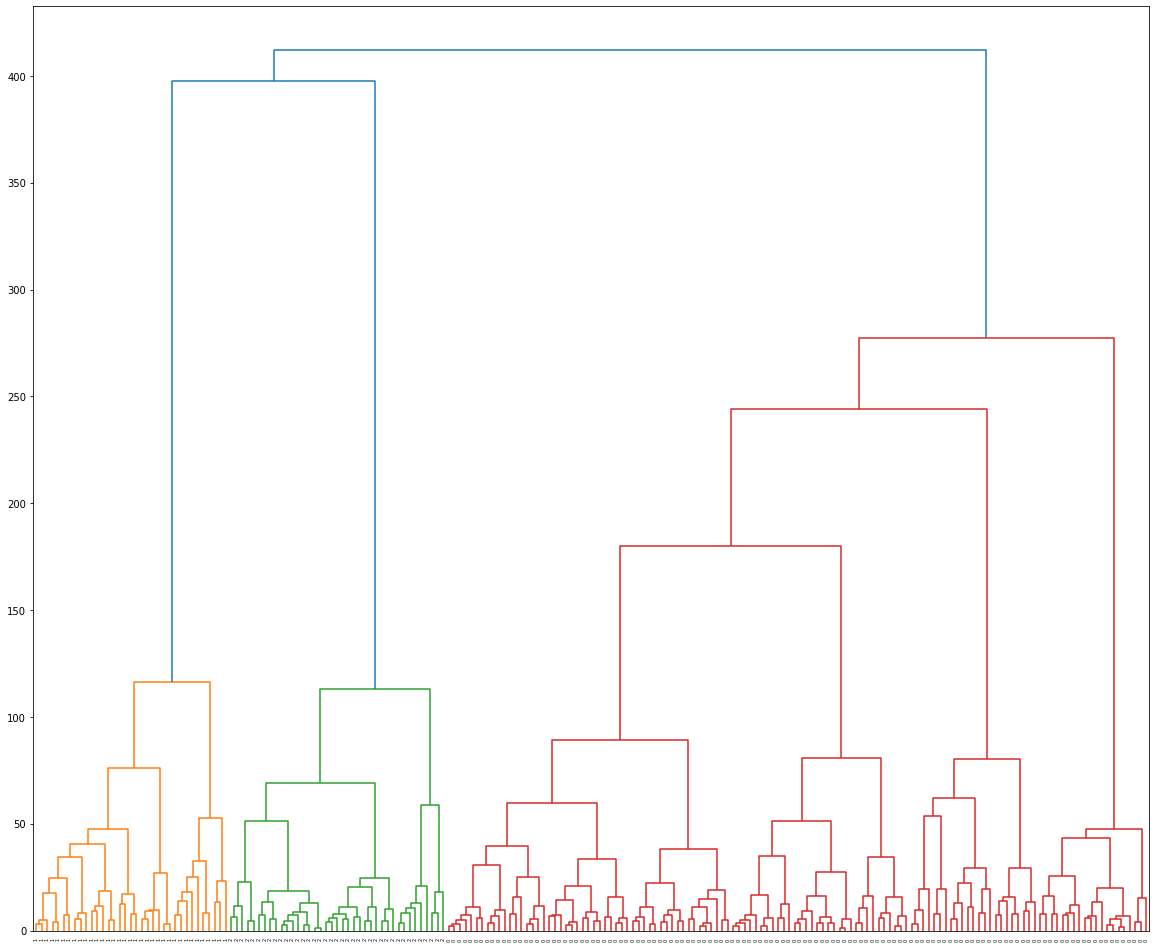

In [66]:
df['aggl_res_3'] = get_aggl_clustering(X, 3)
 
linked = linkage(X, 'ward')
plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=df['aggl_res_3'].to_list(),
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

In [67]:
df['aggl_res_6'] = get_aggl_clustering(df[['age', 'annual_income', 'spending_score']], 6)
get_3d_visualization(df, 'aggl_res_6')

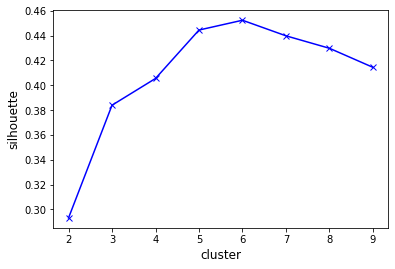

In [69]:
# напишем функцию, как и при подсчёте метода локтя
def get_silhouette_agl(cluster_num, X):
    #k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    #k_means.fit(X)

    
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, get_aggl_clustering(X, clust_num))
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')